# PBMC3k dataset

In [1]:
import os
import subprocess

whoami = subprocess.run("whoami", stdout=subprocess.PIPE)
if (b'jovyan' in whoami.stdout) & (not os.path.isfile("/home/jovyan/data/pbmc3k.h5ad")):
    !sh /home/jovyan/data/pbmc3k.sh

In [2]:
from typing import NamedTuple
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

from tools.preprocessing import get_quantiles, filter_pipeline

ModuleNotFoundError: No module named 'mygene'

In [ ]:
class Config(NamedTuple):
    data: ad.AnnData = sc.read_h5ad("/home/jovyan/data/pbmc3k.h5ad")
    export: str = "/home/jovyan/output"
    
conf = Config()

In [ ]:
sc.pp.filter_cells(conf.data, min_genes=200)
sc.pp.filter_genes(conf.data, min_cells=3)

In [ ]:
conf.data

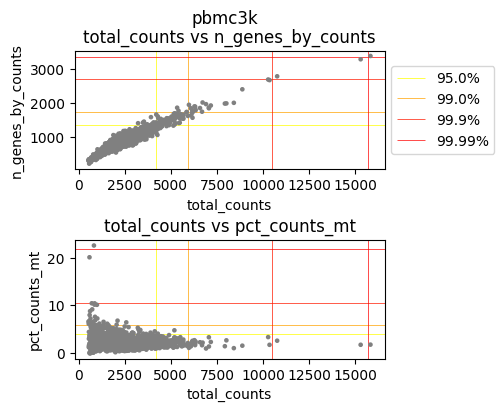

In [7]:
for k, v in {"pbmc3k": conf.data}.items():
    v.var['mt'] = v.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(v, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    fig, ax = plt.subplots(2, 1, figsize=(4, 4))
    plt.subplots_adjust(hspace=.6)

    for a, y in zip(ax, ["n_genes_by_counts", "pct_counts_mt"]):
        sc.pl.scatter(v, x="total_counts", y=y, ax=a, show=False)
        area = [.95, .99, .999, .9999]
        xlims, ylims = a.get_xlim(), a.get_ylim()
        for xval, yval, q in zip(
            get_quantiles(v, "total_counts", area=area),
            get_quantiles(v, y, area=area),
            area
        ):
            kwargs = dict(
                zorder=-1, linewidth=.5, 
                color=plt.cm.autumn_r(q ** 100)
            )
            a.vlines(xval, *ylims, **kwargs)
            a.hlines(yval, *xlims, label=f"{100 * q}%", **kwargs)
        if y == "n_genes_by_counts":
            a.legend(loc="center left", bbox_to_anchor=(1, .5))
        a.set_title(f"total_counts vs {y}")
        a.set(xlim=xlims, ylim=ylims)
        

    fig.suptitle(
        k,
        verticalalignment="center",
        y=.96
    );
    
    # fig.savefig(
    #     f"{outputdir}/{k}_qc.png",
    #     **kwarg_savefig
    # )

In [8]:
filter_dict = {
    "n_genes_by_counts": lambda x: x < 2500,
    "pct_counts_mt": lambda x: x < 10
}

In [9]:
conf = Config(data=filter_pipeline(conf.data, filter_dict))

/tmp/ipykernel_1440/3658096343.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  v.var['mt'] = v.var_names.str.startswith('MT-')


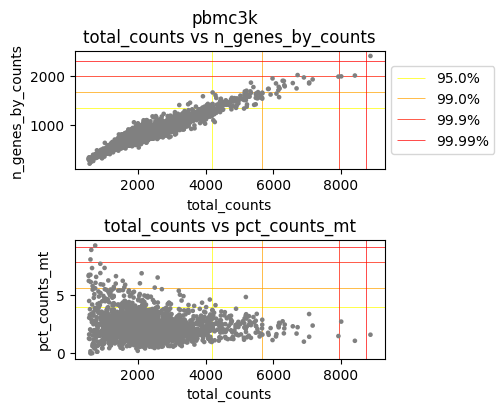

In [10]:
for k, v in {"pbmc3k": conf.data}.items():
    v.var['mt'] = v.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(v, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    fig, ax = plt.subplots(2, 1, figsize=(4, 4))
    plt.subplots_adjust(hspace=.6)

    for a, y in zip(ax, ["n_genes_by_counts", "pct_counts_mt"]):
        sc.pl.scatter(v, x="total_counts", y=y, ax=a, show=False)
        area = [.95, .99, .999, .9999]
        xlims, ylims = a.get_xlim(), a.get_ylim()
        for xval, yval, q in zip(
            get_quantiles(v, "total_counts", area=area),
            get_quantiles(v, y, area=area),
            area
        ):
            kwargs = dict(
                zorder=-1, linewidth=.5, 
                color=plt.cm.autumn_r(q ** 100)
            )
            a.vlines(xval, *ylims, **kwargs)
            a.hlines(yval, *xlims, label=f"{100 * q}%", **kwargs)
        if y == "n_genes_by_counts":
            a.legend(loc="center left", bbox_to_anchor=(1, .5))
        a.set_title(f"total_counts vs {y}")
        a.set(xlim=xlims, ylim=ylims)
        

    fig.suptitle(
        k,
        verticalalignment="center",
        y=.96
    );
    
    # fig.savefig(
    #     f"{outputdir}/{k}_qc.png",
    #     **kwarg_savefig
    # )

In [11]:
sc.pp.normalize_total(conf.data, target_sum=1e6)
sc.pp.log1p(conf.data, base=2)

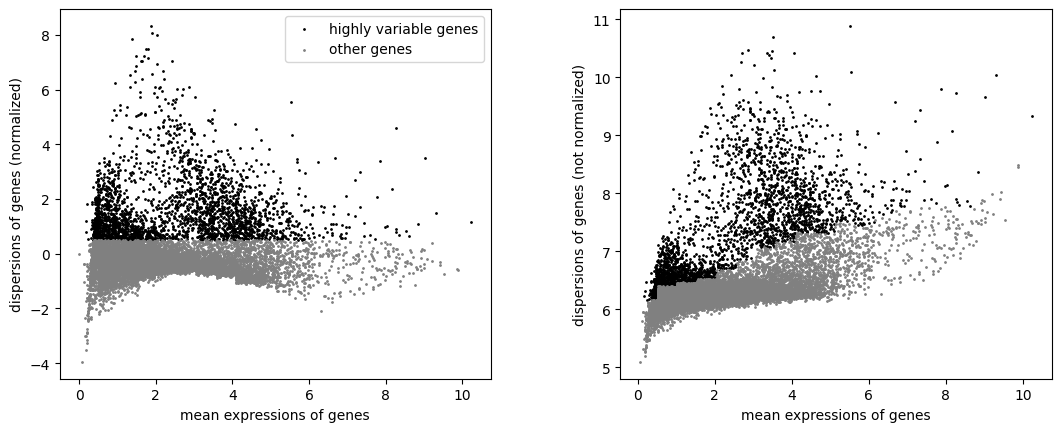

In [12]:
sc.pp.highly_variable_genes(conf.data, min_mean=0.0125, max_mean=15, min_disp=0.5)
sc.pl.highly_variable_genes(conf.data)

In [13]:
sc.tl.pca(conf.data, svd_solver='arpack')

In [17]:
sc.pp.neighbors(conf.data, n_pcs=50)

In [18]:
sc.tl.umap(conf.data)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


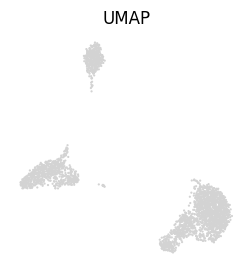

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(conf.data, ax=ax, size=10, show=False)
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

# fig.savefig(
#     f"{outputdir}/umap_{kind}.png",
#     **kwarg_savefig
# )

In [20]:
sc.tl.leiden(conf.data, resolution=1)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


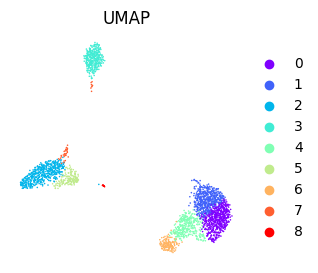

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(conf.data, color="leiden", ax=ax, size=5, show=False, palette="rainbow")
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

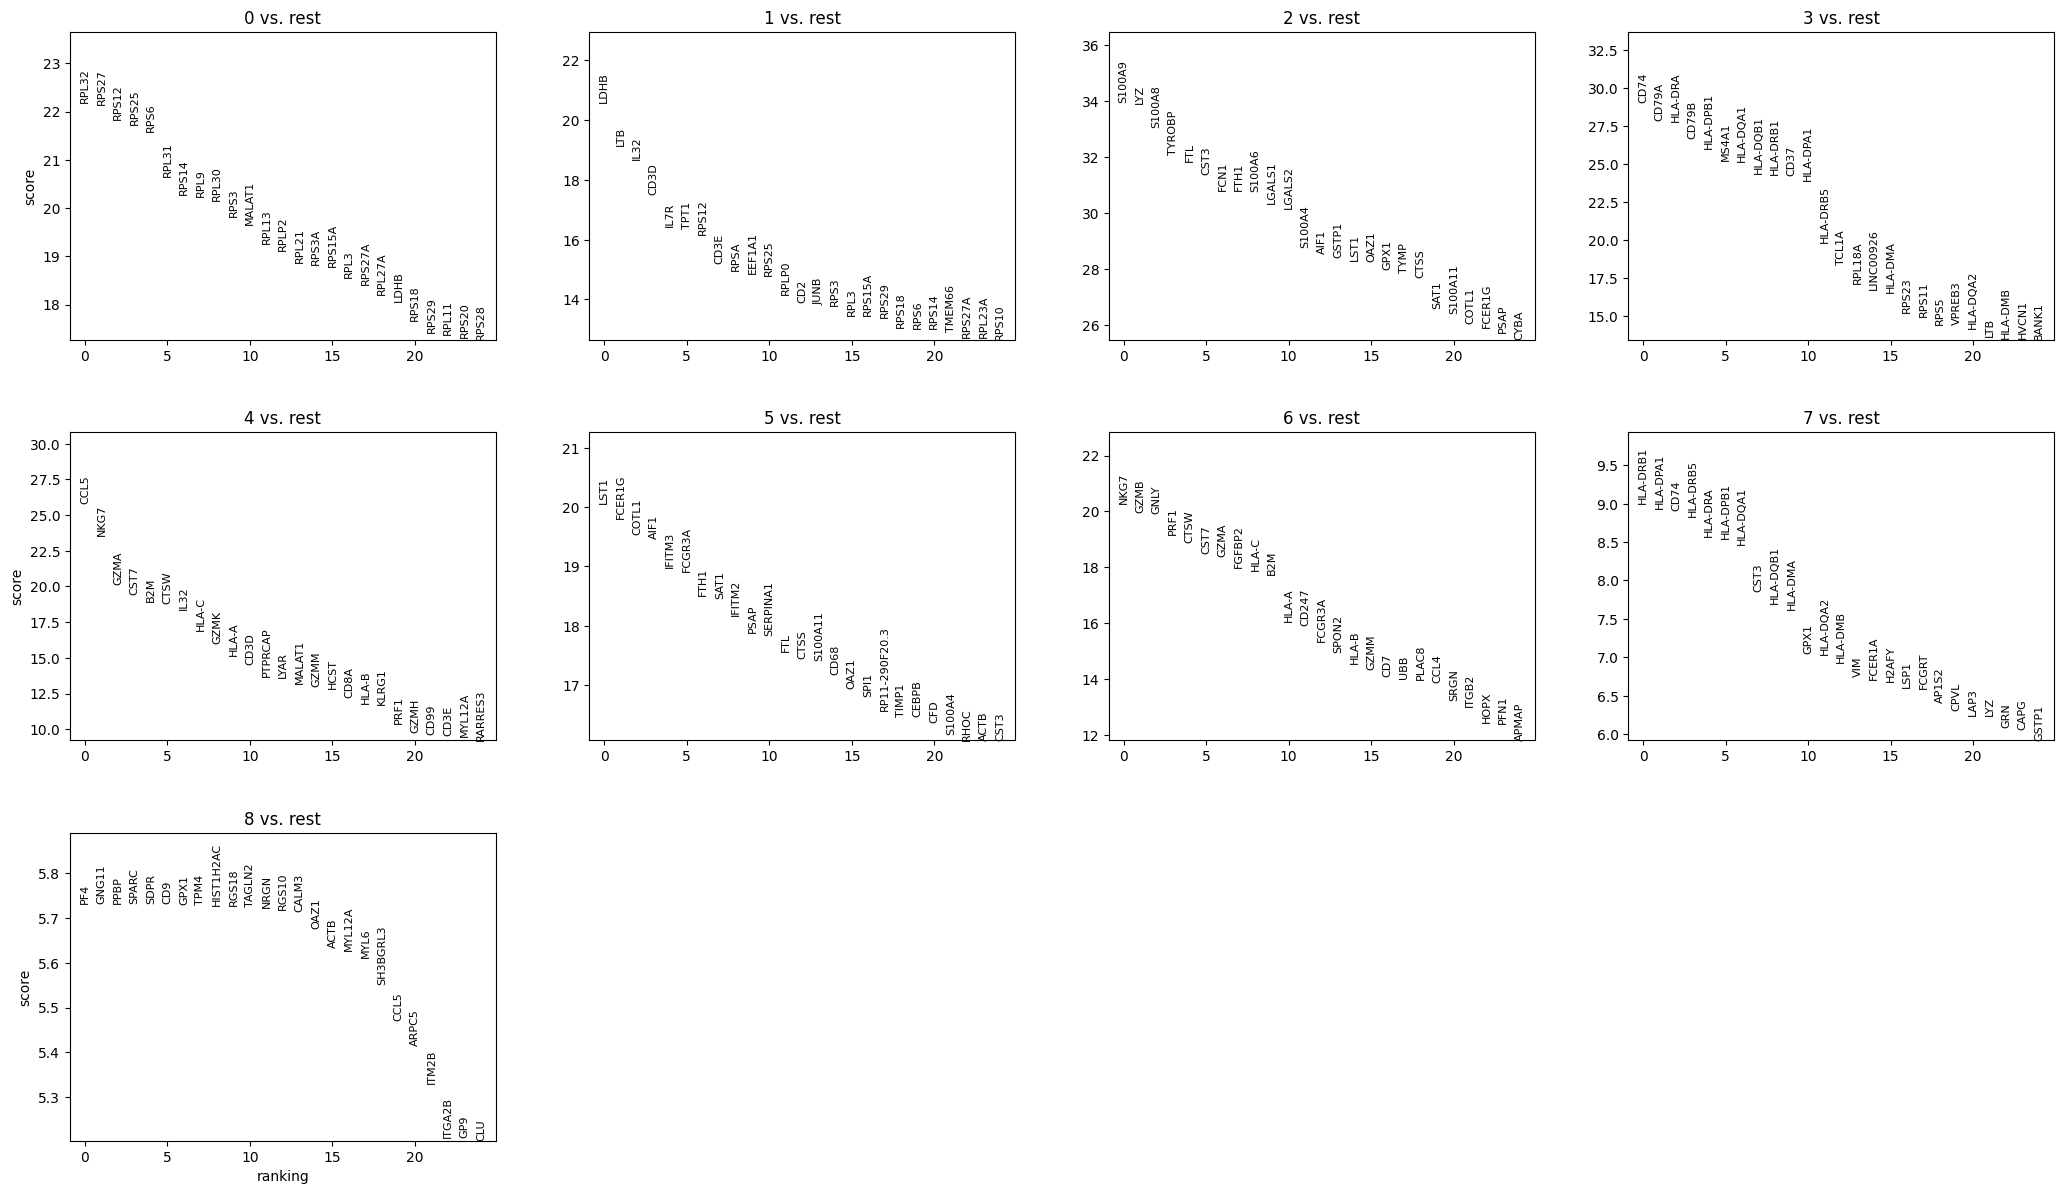

In [23]:
sc.tl.rank_genes_groups(conf.data, "leiden", method='wilcoxon')
sc.pl.rank_genes_groups(conf.data, n_genes=25, sharey=False)

In [6]:
import grnet

In [6]:
import subprocess

In [13]:
hoge = subprocess.run("whoami", stdout=subprocess.PIPE)

In [36]:
hoge.stdout == b'jovyan\n'

True

In [37]:
hoge.stdout

b'jovyan\n'

In [39]:
b'jovyan' in b'jovyan\n'

True